In [1]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving star_classification.csv to star_classification.csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
print(data.head())

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.77913

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']

In [ ]:
X = data[features]

In [ ]:
y = data['class']

In [ ]:
y = y.astype('category').cat.codes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11860
           1       0.97      0.89      0.93      3797
           2       0.94      1.00      0.97      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11860
           1       0.95      0.91      0.93      3797
           2       0.96      1.00      0.98      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



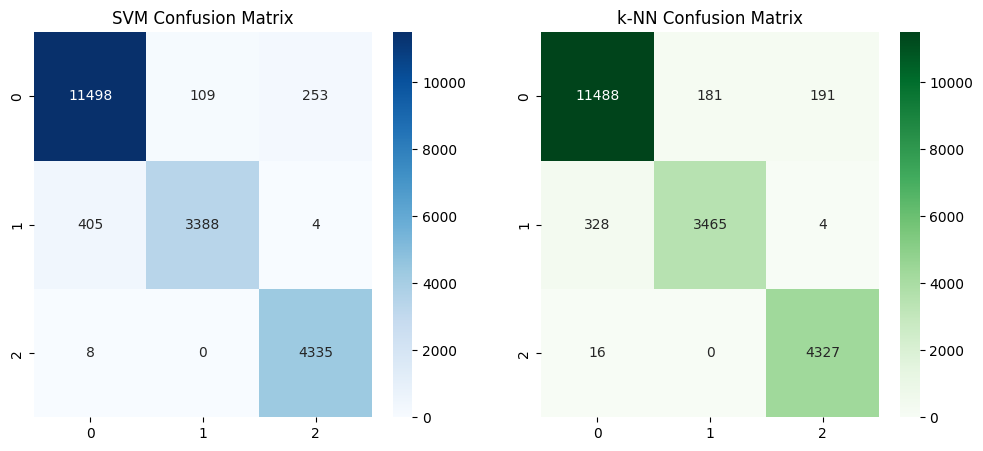

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("SVM Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title("k-NN Confusion Matrix")
plt.show()

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


In [ ]:
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"k-NN Accuracy: {accuracy_knn:.2f}")

SVM Accuracy: 0.96
k-NN Accuracy: 0.96
